# EDA

In [241]:
import pandas as pd

path = "../data/"

schedule = pd.read_csv(path+"processed/schedule.csv")
airports = pd.read_csv(path+"processed/airports.csv")
airlines = pd.read_csv(path+"processed/airlines.csv")
routes = pd.read_csv(path+"processed/routes.csv")

In [242]:
print(schedule.shape[0])
schedule.head()

566924


,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED
0,2019-01-01,AA,PHX,MCO,2019-01-01 23:35:00,2019-01-01 23:32:00,2019-01-02 05:30:00,2019-01-02 05:25:00,0.0,0.0
1,2019-01-01,AA,DFW,SFO,2019-01-01 22:15:00,2019-01-01 22:12:00,2019-01-02 00:10:00,2019-01-02 00:47:00,0.0,0.0
2,2019-01-01,AA,LAX,IND,2019-01-01 22:57:00,2019-01-01 22:56:00,2019-01-02 06:01:00,2019-01-02 05:43:00,0.0,0.0
3,2019-01-01,AA,DFW,BUF,2019-01-01 20:30:00,2019-01-01 20:41:00,2019-01-02 00:22:00,2019-01-02 00:11:00,0.0,0.0
4,2019-01-01,AA,LAX,PHL,2019-01-01 21:45:00,2019-01-01 22:04:00,2019-01-02 05:52:00,2019-01-02 05:37:00,0.0,0.0


# Initial Observations

1. For how many days is our data collected?<br>
Data includes Jan 1st to Jan 31st 2019.

In [243]:
schedule["FL_DATE"].unique()

array(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
       '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
       '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
       '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
       '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
       '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
       '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
       '2019-01-29', '2019-01-30', '2019-01-31'], dtype=object)

2. What country does the data belong to?<br>
Data is based on USA and near by Islands.

In [244]:
temp = pd.DataFrame(pd.concat([schedule["ORIGIN"], schedule["DEST"]]), columns=["IATA"]).merge(airports, how="inner", left_on="IATA", right_on="IATA")
print(temp["Country"].unique())
temp = None

['United States' 'Puerto Rico' 'American Samoa' 'Virgin Islands' 'Guam'
 'Northern Mariana Islands']


# Basic Statistics

In [245]:
fig_width = 12
fig_height = 4

## 1. Time Series

### 1. Flights per day

In [246]:
temp = pd.DataFrame(schedule.groupby("FL_DATE")["ORIGIN"].count())
temp.reset_index(inplace=True)
temp.columns = ["Date", "No of flights"]
temp["Day"] = pd.to_datetime(temp["Date"]).dt.day
temp["Day of week"] = pd.to_datetime(temp["Date"]).dt.strftime("%a")

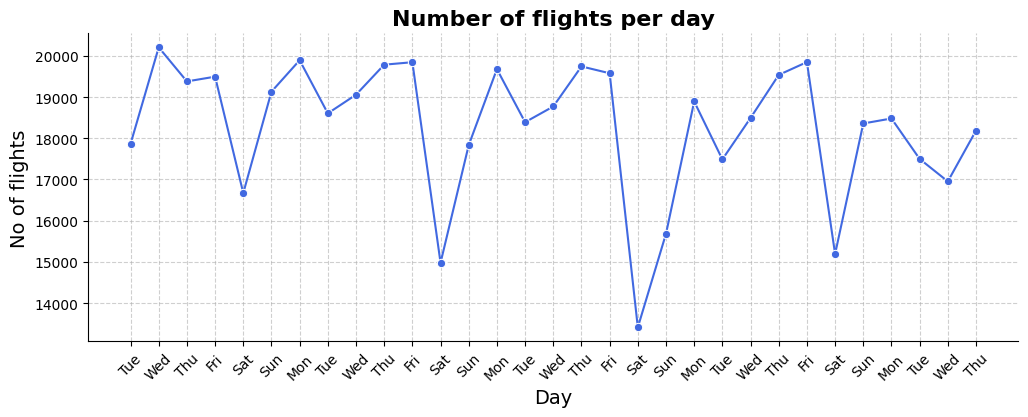

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(fig_width, fig_height))
p = sns.lineplot(data=temp, x="Day", y="No of flights", marker="o", color="royalblue")
p.set_xticks(temp["Day"], labels=temp["Day of week"], rotation=45)
plt.title("Number of flights per day", fontsize=16, fontweight="bold")
plt.xlabel("Day", fontsize=14)
plt.ylabel("No of flights", fontsize=14)
sns.despine()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

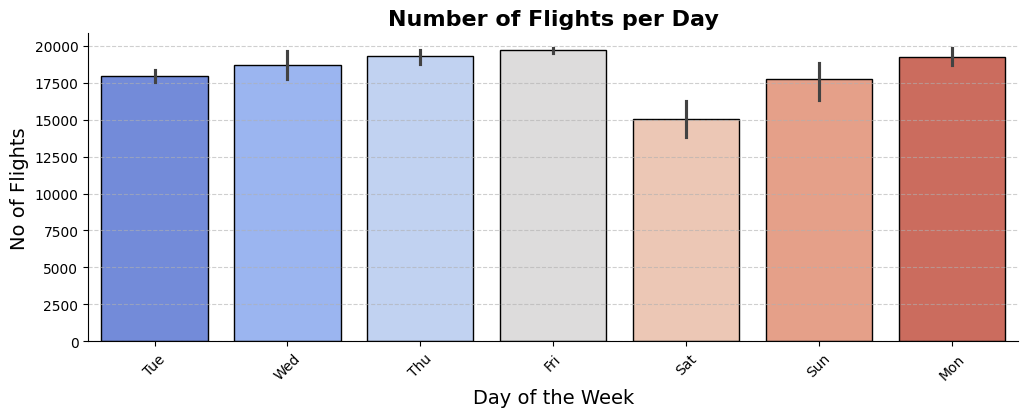

In [248]:
plt.figure(figsize=(fig_width, fig_height))
p = sns.barplot(data=temp, x="Day of week", hue="Day of week", y="No of flights", palette="coolwarm", edgecolor="black")
plt.title("Number of Flights per Day", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("No of Flights", fontsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()
temp = None

### 2. Flights by country

#### Inbound + Outbound

In [249]:
temp = pd.DataFrame(pd.concat([schedule["ORIGIN"], schedule["DEST"]]), columns=["IATA"]).merge(airports, how="inner", left_on="IATA", right_on="IATA")
print(temp["Country"].value_counts())
temp = None

Country
United States               1127637
Puerto Rico                    5093
Virgin Islands                  872
Guam                            142
Northern Mariana Islands         82
American Samoa                   22
Name: count, dtype: int64


#### Inbound

In [250]:
temp = pd.DataFrame(schedule["DEST"])
temp.columns = ["IATA"]
temp = temp.merge(airports, how="inner", left_on="IATA", right_on="IATA")
print(temp["Country"].value_counts())
temp = None

Country
United States               563824
Puerto Rico                   2541
Virgin Islands                 436
Guam                            71
Northern Mariana Islands        41
American Samoa                  11
Name: count, dtype: int64


#### Outbound

In [251]:
temp = pd.DataFrame(schedule["ORIGIN"])
temp.columns = ["IATA"]
temp = temp.merge(airports, how="inner", left_on="IATA", right_on="IATA")
print(temp["Country"].value_counts())
temp = None

Country
United States               563813
Puerto Rico                   2552
Virgin Islands                 436
Guam                            71
Northern Mariana Islands        41
American Samoa                  11
Name: count, dtype: int64


### 3. Flights by city

#### Inbound + Outbound

In [252]:
temp = pd.DataFrame(pd.concat([schedule["ORIGIN"], schedule["DEST"]]), columns=["IATA"]).merge(airports, how="inner", left_on="IATA", right_on="IATA")
print(temp["City"].value_counts())
temp = None

City
Atlanta              61651
Chicago              57951
New York             47285
Dallas-Fort Worth    45502
Houston              38777
                     ...  
Ogdensburg              20
Hagerstown              20
Owensboro               18
Adak Island             18
Ogden                   16
Name: count, Length: 334, dtype: int64


#### Inbound

In [253]:
temp = pd.DataFrame(schedule["DEST"])
temp.columns = ["IATA"]
temp = temp.merge(airports, how="inner", left_on="IATA", right_on="IATA")
print(temp["City"].value_counts())
temp = None

City
Atlanta              30818
Chicago              28939
New York             23635
Dallas-Fort Worth    22742
Houston              19365
                     ...  
Hagerstown              10
Ogdensburg              10
Owensboro                9
Adak Island              9
Ogden                    8
Name: count, Length: 334, dtype: int64


#### Outbound

In [254]:
temp = pd.DataFrame(schedule["ORIGIN"])
temp.columns = ["IATA"]
temp = temp.merge(airports, how="inner", left_on="IATA", right_on="IATA")
print(temp["City"].value_counts())
temp = None

City
Atlanta              30833
Chicago              29012
New York             23650
Dallas-Fort Worth    22760
Houston              19412
                     ...  
Ogdensburg              10
Hagerstown              10
Owensboro                9
Adak Island              9
Ogden                    8
Name: count, Length: 334, dtype: int64


### 4. Flights by airlines

In [255]:
temp = pd.DataFrame(schedule["OP_CARRIER"].value_counts()).reset_index()
temp.shape
temp.columns = ["IATA", "Count"]
temp = temp.merge(airlines, how="inner", left_on="IATA", right_on="IATA")
print(temp[["Name", "Count"]].head())
temp = None

                 Name   Count
0  Southwest Airlines  107318
1   American Airlines   75498
2     Delta Air Lines   73503
3             SkyWest   61956
4     United Airlines   46213


### 5. Flights by routes

#### One way

In [256]:
temp = pd.DataFrame(schedule.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()
temp.columns = ["ORIGIN", "DEST", "Count"]
temp.sort_values("Count", ascending=False, inplace=True)
print(temp.head())
temp = None

     ORIGIN DEST  Count
2839    LAX  SFO   1211
4927    SFO  LAX   1209
3839    ORD  LGA   1119
2938    LGA  ORD   1115
2805    LAX  LAS   1059


#### Combined

In [257]:
temp = pd.DataFrame(schedule.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()
temp.columns = ["ORIGIN", "DEST", "Count"]
temp.sort_values("Count", ascending=False, inplace=True)

temp = temp.merge(temp, how="inner", left_on=["ORIGIN", "DEST"], right_on=["DEST", "ORIGIN"])
temp["Count"] = temp["Count_x"] + temp["Count_y"]
temp.drop(["Count_x", "Count_y"], axis=1, inplace=True)

print(temp.head(6))
print(temp.shape)

  ORIGIN_x DEST_x ORIGIN_y DEST_y  Count
0      LAX    SFO      SFO    LAX   2420
1      SFO    LAX      LAX    SFO   2420
2      ORD    LGA      LGA    ORD   2234
3      LGA    ORD      ORD    LGA   2234
4      LAX    LAS      LAS    LAX   2115
5      LAS    LAX      LAX    LAS   2115
(5512, 5)


In [258]:
temp["Combined"] = temp.apply(lambda x: "".join(sorted([x["ORIGIN_x"], x["DEST_x"], x["ORIGIN_y"], x["DEST_y"]])), axis=1)
temp.drop_duplicates(subset=["Combined"], inplace=True)
temp.drop(["Combined"], axis=1, inplace=True)
print(temp.head())
print(temp.shape)
temp = None

  ORIGIN_x DEST_x ORIGIN_y DEST_y  Count
0      LAX    SFO      SFO    LAX   2420
2      ORD    LGA      LGA    ORD   2234
4      LAX    LAS      LAS    LAX   2115
6      JFK    LAX      LAX    JFK   2101
8      OGG    HNL      HNL    OGG   1652
(2756, 5)


### 6. Late Arrivals

In [259]:
schedule["CRS_DEP_TIME"] = pd.to_datetime(schedule["CRS_DEP_TIME"])
schedule["DEP_TIME"] = pd.to_datetime(schedule["DEP_TIME"])
schedule["CRS_ARR_TIME"] = pd.to_datetime(schedule["CRS_ARR_TIME"])
schedule["ARR_TIME"] = pd.to_datetime(schedule["ARR_TIME"])

In [260]:
def split_late_early_arrival():
    late = pd.DataFrame(schedule[schedule["CRS_ARR_TIME"] < schedule["ARR_TIME"]]) # late
    early = pd.DataFrame(schedule[schedule["CRS_ARR_TIME"] >= schedule["ARR_TIME"]]) # on time or early
    return (late, early)

def split_late_early_departure():
    late = pd.DataFrame(schedule[schedule["CRS_DEP_TIME"] < schedule["DEP_TIME"]]) # late
    early = pd.DataFrame(schedule[schedule["CRS_DEP_TIME"] >= schedule["DEP_TIME"]]) # on time or early
    return (late, early)

In [261]:
late, early = split_late_early_arrival()

print("% Flights with late arrivals              ", late.shape[0] / schedule.shape[0])
print("% Flights with on time or early arrivals  ", early.shape[0] / schedule.shape[0])
print("Average delay in arrivals                 ", (late["ARR_TIME"] - late["CRS_ARR_TIME"]).mean())
late = None
early = None

% Flights with late arrivals               0.3409151843986143
% Flights with on time or early arrivals   0.6590848156013858
Average delay in arrivals                  0 days 00:47:10.320324101


### 7. Late Departures

In [262]:
late, early = split_late_early_departure()

print("% Flights with late departures              ", late.shape[0] / schedule.shape[0])
print("% Flights with on time or early departures  ", early.shape[0] / schedule.shape[0])
print("Average delay in departures                 ", (late["DEP_TIME"] - late["CRS_DEP_TIME"]).mean())
late = None
early = None

% Flights with late departures               0.32305917548031127
% Flights with on time or early departures   0.6769408245196887
Average delay in departures                  0 days 00:37:18.788861588


### 8. Late Arrivals by day

In [263]:
def group_count(group_cols, agg_cols, df1, df2, df3):
    df1 = pd.DataFrame(df1.groupby(group_cols)[agg_cols].count()).reset_index()
    df2 = pd.DataFrame(df2.groupby(group_cols)[agg_cols].count()).reset_index()
    df3 = pd.DataFrame(df3.groupby(group_cols)[agg_cols].count()).reset_index()
    return (df1, df2, df3)

In [264]:
late, early = split_late_early_arrival()
late, early, temp = group_count("FL_DATE", "OP_CARRIER", late, early, schedule)

late["OP_CARRIER"] = late["OP_CARRIER"] / temp["OP_CARRIER"]
early["OP_CARRIER"] = early["OP_CARRIER"] / temp["OP_CARRIER"]
temp = late.merge(early, how="inner", left_on="FL_DATE", right_on="FL_DATE")
temp.sort_values("FL_DATE", inplace=True)

print(temp.head())
late = None
early = None

      FL_DATE  OP_CARRIER_x  OP_CARRIER_y
0  2019-01-01      0.384818      0.615182
1  2019-01-02      0.451180      0.548820
2  2019-01-03      0.365635      0.634365
3  2019-01-04      0.290895      0.709105
4  2019-01-05      0.308098      0.691902


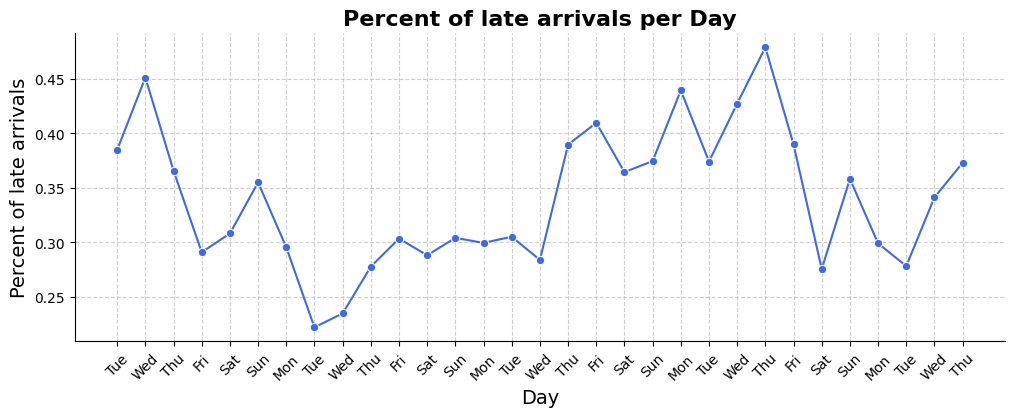

In [265]:
temp.columns = ["Date", "Late", "On Time"]
temp["Day"] = pd.to_datetime(temp["Date"]).dt.day
temp["Day of week"] = pd.to_datetime(temp["Date"]).dt.strftime("%a")

plt.figure(figsize=(fig_width, fig_height))
p = sns.lineplot(data=temp, x="Day", y="Late", marker="o", color="royalblue")
p.set_xticks(temp["Day"], labels=temp["Day of week"], rotation=45)
plt.title("Late arrivals per Day", fontsize=16, fontweight="bold")
plt.xlabel("Day", fontsize=14)
plt.ylabel("Percent of late arrivals", fontsize=14)
sns.despine()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
temp = None

In [266]:
late, early = split_late_early_arrival()

late["Late"] = late["ARR_TIME"] - late["CRS_ARR_TIME"]
early["Early"] = early["CRS_ARR_TIME"] - early["ARR_TIME"]

late = pd.DataFrame(late.groupby("FL_DATE")["Late"].mean()).reset_index()
early = pd.DataFrame(early.groupby("FL_DATE")["Early"].mean()).reset_index()

temp = late.merge(early, how="inner", left_on="FL_DATE", right_on="FL_DATE")
temp["Late"] = temp["Late"].dt.seconds
temp["Early"] = temp["Early"].dt.seconds
late = None
early = None
temp.head()

,FL_DATE,Late,Early
0,2019-01-01,2557,1319
1,2019-01-02,2445,1372
2,2019-01-03,2550,1207
3,2019-01-04,2434,1118
4,2019-01-05,2728,1405


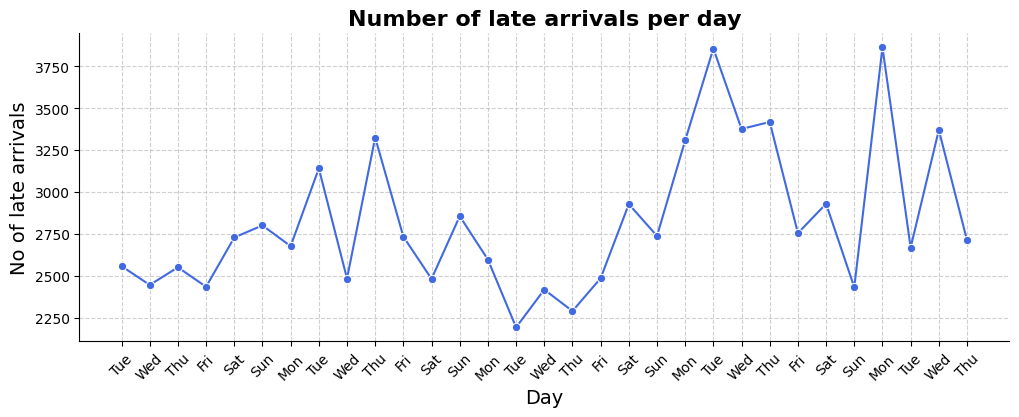

In [267]:
temp.columns = ["Date", "Late", "On Time"]
temp["Day"] = pd.to_datetime(temp["Date"]).dt.day
temp["Day of week"] = pd.to_datetime(temp["Date"]).dt.strftime("%a")

plt.figure(figsize=(fig_width, fig_height))
p = sns.lineplot(data=temp, x="Day", y="Late", marker="o", color="royalblue")
p.set_xticks(temp["Day"], labels=temp["Day of week"], rotation=45)
plt.title("Late arrivals per day", fontsize=16, fontweight="bold")
plt.xlabel("Day", fontsize=14)
plt.ylabel("No of late arrivals", fontsize=14)
sns.despine()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
temp = None

### 9. Late Departures by day

In [268]:
late, early = split_late_early_departure()
late, early, temp = group_count("FL_DATE", "OP_CARRIER", late, early, schedule)

late["OP_CARRIER"] = late["OP_CARRIER"] / temp["OP_CARRIER"]
early["OP_CARRIER"] = early["OP_CARRIER"] / temp["OP_CARRIER"]
temp = late.merge(early, how="inner", left_on="FL_DATE", right_on="FL_DATE")

print(temp.head())
late = None
early = None

      FL_DATE  OP_CARRIER_x  OP_CARRIER_y
0  2019-01-01      0.394671      0.605329
1  2019-01-02      0.444499      0.555501
2  2019-01-03      0.376677      0.623323
3  2019-01-04      0.301154      0.698846
4  2019-01-05      0.320816      0.679184


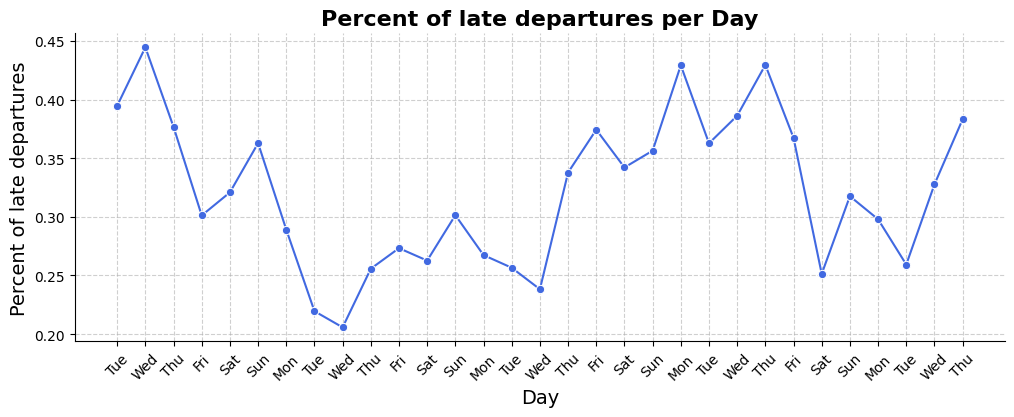

In [ ]:
temp.columns = ["Date", "Late", "On Time"]
temp["Day"] = pd.to_datetime(temp["Date"]).dt.day
temp["Day of week"] = pd.to_datetime(temp["Date"]).dt.strftime("%a")

plt.figure(figsize=(fig_width, fig_height))
p = sns.lineplot(data=temp, x="Day", y="Late", marker="o", color="royalblue")
p.set_xticks(temp["Day"], labels=temp["Day of week"], rotation=45)
plt.title("Late departures per Day", fontsize=16, fontweight="bold")
plt.xlabel("Day", fontsize=14)
plt.ylabel("Percent of late departures", fontsize=14)
sns.despine()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
temp = None

In [270]:
late, early = split_late_early_departure()

late["Late"] = late["DEP_TIME"] - late["CRS_DEP_TIME"]
early["Early"] = early["CRS_DEP_TIME"] - early["DEP_TIME"]

late = pd.DataFrame(late.groupby("FL_DATE")["Late"].mean()).reset_index()
early = pd.DataFrame(early.groupby("FL_DATE")["Early"].mean()).reset_index()

temp = late.merge(early, how="inner", left_on="FL_DATE", right_on="FL_DATE")
temp["Late"] = temp["Late"].dt.seconds
temp["Early"] = temp["Early"].dt.seconds
late = None
early = None
temp.head()

,FL_DATE,Late,Early
0,2019-01-01,1974,747
1,2019-01-02,2033,807
2,2019-01-03,1736,605
3,2019-01-04,1688,506
4,2019-01-05,2022,788


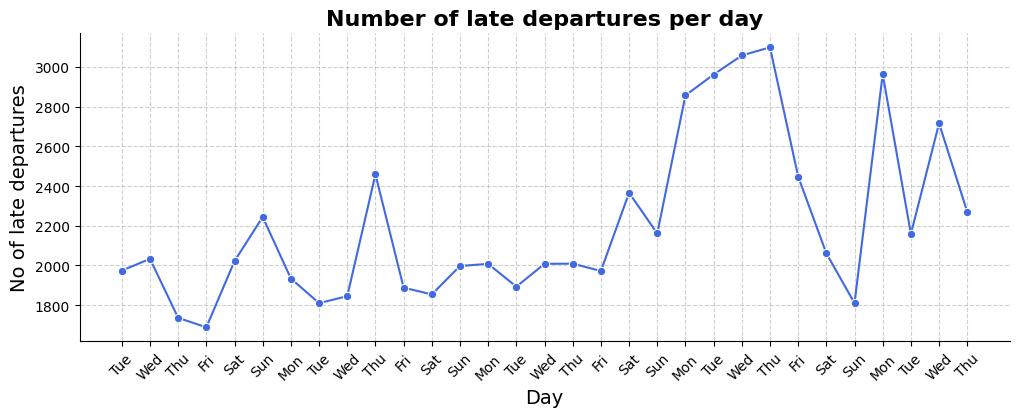

In [ ]:
temp.columns = ["Date", "Late", "On Time"]
temp["Day"] = pd.to_datetime(temp["Date"]).dt.day
temp["Day of week"] = pd.to_datetime(temp["Date"]).dt.strftime("%a")

plt.figure(figsize=(fig_width, fig_height))
p = sns.lineplot(data=temp, x="Day", y="Late", marker="o", color="royalblue")
p.set_xticks(temp["Day"], labels=temp["Day of week"], rotation=45)
plt.title("Late departures per day", fontsize=16, fontweight="bold")
plt.xlabel("Day", fontsize=14)
plt.ylabel("No of late departures", fontsize=14)
sns.despine()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
temp = None

### 10. Late Arrivals by city

In [77]:
late, early = split_late_early_arrival()

late = late.merge(airports, how="inner", left_on="DEST", right_on="IATA")
early = early.merge(airports, how="inner", left_on="DEST", right_on="IATA")
temp = schedule.merge(airports, how="inner", left_on="DEST", right_on="IATA")

late, early, temp = group_count("City", "OP_CARRIER", late, early, temp)
late.rename(columns={"OP_CARRIER": "count"}, inplace=True)
early.rename(columns={"OP_CARRIER": "count"}, inplace=True)
temp.rename(columns={"OP_CARRIER": "count"}, inplace=True)

late = late.merge(temp, how="inner", left_on="City", right_on="City")
early = early.merge(temp, how="inner", left_on="City", right_on="City")
late["Percent"] = pd.DataFrame(late["count_x"] / late["count_y"])
early["Percent"] = pd.DataFrame(early["count_x"] / early["count_y"])
late = late[["City", "Percent"]]
early = early[["City", "Percent"]]

temp = late.merge(early, how="inner", left_on="City", right_on="City")
temp = temp.sort_values("Percent_x", ascending=False)
print(temp.head())
late = None
early = None
temp = None

           City  Percent_x  Percent_y
220       Ogden   0.875000   0.125000
81       Dothan   0.814159   0.185841
87         Elko   0.777778   0.222222
221  Ogdensburg   0.600000   0.400000
204    Muskegon   0.595745   0.404255


In [78]:
late, early = split_late_early_arrival()

late = late.merge(airports, how="inner", left_on="DEST", right_on="IATA")
early = early.merge(airports, how="inner", left_on="DEST", right_on="IATA")

late["Late"] = late["ARR_TIME"] - late["CRS_ARR_TIME"]
early["Early"] = early["CRS_ARR_TIME"] - early["ARR_TIME"]

late = pd.DataFrame(late.groupby("City")["Late"].mean()).reset_index()
early = pd.DataFrame(early.groupby("City")["Early"].mean()).reset_index()

temp = late.merge(early, how="inner", left_on="City", right_on="City")
temp["Late_Seconds"] = temp["Late"].dt.seconds
temp["Early_Seconds"] = temp["Early"].dt.seconds
temp = temp.sort_values("Late", ascending=False)
print(temp.head())
late = None
early = None
temp = None

                     City                      Late                     Early  \
87                   Elko 0 days 19:15:04.285714285           0 days 00:38:35   
81                 Dothan 0 days 17:17:16.304347826 0 days 01:11:37.142857142   
181            MONTGOMERY 0 days 15:22:20.254777070 0 days 02:40:08.120300751   
67   Columbus Mississippi 0 days 13:49:41.538461538 0 days 00:13:05.357142857   
230           Panama City 0 days 08:40:02.234042553 0 days 00:14:04.743083003   

     Late_Seconds  Early_Seconds  
87          69304           2315  
81          62236           4297  
181         55340           9608  
67          49781            785  
230         31202            844  


### 11. Late Departures by city

In [79]:
late, early = split_late_early_departure()

late = late.merge(airports, how="inner", left_on="DEST", right_on="IATA")
early = early.merge(airports, how="inner", left_on="DEST", right_on="IATA")
temp = schedule.merge(airports, how="inner", left_on="DEST", right_on="IATA")

late, early, temp = group_count("City", "OP_CARRIER", late, early, temp)
late.rename(columns={"OP_CARRIER": "count"}, inplace=True)
early.rename(columns={"OP_CARRIER": "count"}, inplace=True)
temp.rename(columns={"OP_CARRIER": "count"}, inplace=True)

late = late.merge(temp, how="inner", left_on="City", right_on="City")
early = early.merge(temp, how="inner", left_on="City", right_on="City")
late["Percent"] = pd.DataFrame(late["count_x"] / late["count_y"])
early["Percent"] = pd.DataFrame(early["count_x"] / early["count_y"])
late = late[["City", "Percent"]]
early = early[["City", "Percent"]]

temp = late.merge(early, how="inner", left_on="City", right_on="City")
temp = temp.sort_values("Percent_x", ascending=False)
print(temp.head())
late = None
early = None
temp = None

           City  Percent_x  Percent_y
228   Pago Pago   0.727273   0.272727
204    Muskegon   0.574468   0.425532
191        Mesa   0.533186   0.466814
217  North Bend   0.480000   0.520000
275     Sanford   0.466763   0.533237


In [80]:
late, early = split_late_early_departure()

late = late.merge(airports, how="inner", left_on="DEST", right_on="IATA")
early = early.merge(airports, how="inner", left_on="DEST", right_on="IATA")

late["Late"] = late["DEP_TIME"] - late["CRS_DEP_TIME"]
early["Early"] = early["CRS_DEP_TIME"] - early["DEP_TIME"]

late = pd.DataFrame(late.groupby("City")["Late"].mean()).reset_index()
early = pd.DataFrame(early.groupby("City")["Early"].mean()).reset_index()

temp = late.merge(early, how="inner", left_on="City", right_on="City")
temp["Late_Seconds"] = temp["Late"].dt.seconds
temp["Early_Seconds"] = temp["Early"].dt.seconds
temp = temp.sort_values("Late", ascending=False)
print(temp.head())
late = None
early = None
temp = None

              City                      Late                     Early  \
137  Iron Mountain           0 days 02:04:15 0 days 00:05:23.414634146   
144      Jamestown 0 days 01:52:10.909090909 0 days 00:22:22.222222222   
221     Ogdensburg           0 days 01:42:45           0 days 00:08:10   
57        Cheyenne           0 days 01:35:12           0 days 00:08:09   
117     Hagerstown           0 days 01:28:45           0 days 00:04:40   

     Late_Seconds  Early_Seconds  
137          7455            323  
144          6730           1342  
221          6165            490  
57           5712            489  
117          5325            280  


### 12. Late Arrivals by airlines

In [81]:
late, early = split_late_early_arrival()

late = late["OP_CARRIER"].value_counts().reset_index()
early = early["OP_CARRIER"].value_counts().reset_index()
temp = pd.DataFrame(schedule["OP_CARRIER"].value_counts().reset_index())

late = late.merge(temp, how="inner", left_on="OP_CARRIER", right_on="OP_CARRIER")
early = early.merge(temp, how="inner", left_on="OP_CARRIER", right_on="OP_CARRIER")
late["Percent"] = pd.DataFrame(late["count_x"] / late["count_y"])
early["Percent"] = pd.DataFrame(early["count_x"] / early["count_y"])
late = late[["OP_CARRIER", "Percent"]]
early = early[["OP_CARRIER", "Percent"]]

temp = late.merge(early, how="inner", left_on="OP_CARRIER", right_on="OP_CARRIER")
temp = temp.merge(airlines, how="inner", left_on="OP_CARRIER", right_on="IATA")
temp = temp[["Name", "Percent_x", "Percent_y"]]
temp = temp.sort_values("Percent_x", ascending=False)
print(temp.head())
late = None
early = None
temp = None

                           Name  Percent_x  Percent_y
14                Allegiant Air   0.451430   0.548570
5       American Eagle Airlines   0.422930   0.577070
6               JetBlue Airways   0.397424   0.602576
13            Frontier Airlines   0.393745   0.606255
11  Atlantic Southeast Airlines   0.387094   0.612906


In [82]:
late, early = split_late_early_arrival()

late["Late"] = late["ARR_TIME"] - late["CRS_ARR_TIME"]
early["Early"] = early["CRS_ARR_TIME"] - early["ARR_TIME"]

late = pd.DataFrame(late.groupby("OP_CARRIER")["Late"].mean()).reset_index()
early = pd.DataFrame(early.groupby("OP_CARRIER")["Early"].mean()).reset_index()

temp = late.merge(early, how="inner", left_on="OP_CARRIER", right_on="OP_CARRIER")
temp["Late_Seconds"] = temp["Late"].dt.seconds
temp["Early_Seconds"] = temp["Early"].dt.seconds
temp = temp.merge(airlines, how="inner", left_on="OP_CARRIER", right_on="IATA")
temp = temp[["Name", "Late", "Early", "Late_Seconds", "Early_Seconds"]]
temp = temp.sort_values("Late", ascending=False)
print(temp.head())
late = None
early = None
temp = None

                           Name                      Late  \
12                      SkyWest 0 days 01:08:44.074961865   
0             Pinnacle Airlines 0 days 01:05:14.544564152   
9       American Eagle Airlines 0 days 00:56:41.656545545   
5   Atlantic Southeast Airlines 0 days 00:56:01.926896260   
3               JetBlue Airways 0 days 00:54:00.675965665   

                       Early  Late_Seconds  Early_Seconds  
12 0 days 00:22:08.919022839          4124           1328  
0  0 days 00:22:36.774757706          3914           1356  
9  0 days 00:14:55.679264555          3401            895  
5  0 days 00:19:48.278622898          3361           1188  
3  0 days 00:50:47.003042955          3240           3047  


### 13. Late Departures by airlines

In [83]:
late, early = split_late_early_departure()

late = late["OP_CARRIER"].value_counts().reset_index()
early = early["OP_CARRIER"].value_counts().reset_index()
temp = pd.DataFrame(schedule["OP_CARRIER"].value_counts().reset_index())

late = late.merge(temp, how="inner", left_on="OP_CARRIER", right_on="OP_CARRIER")
early = early.merge(temp, how="inner", left_on="OP_CARRIER", right_on="OP_CARRIER")
late["Percent"] = pd.DataFrame(late["count_x"] / late["count_y"])
early["Percent"] = pd.DataFrame(early["count_x"] / early["count_y"])
late = late[["OP_CARRIER", "Percent"]]
early = early[["OP_CARRIER", "Percent"]]

temp = late.merge(early, how="inner", left_on="OP_CARRIER", right_on="OP_CARRIER")
temp = temp.merge(airlines, how="inner", left_on="OP_CARRIER", right_on="IATA")
temp = temp[["Name", "Percent_x", "Percent_y"]]
temp = temp.sort_values("Percent_x", ascending=False)
print(temp.head())
late = None
early = None
temp = None

                  Name  Percent_x  Percent_y
0   Southwest Airlines   0.407527   0.592473
5      JetBlue Airways   0.390516   0.609484
12   Frontier Airlines   0.390059   0.609941
14       Allegiant Air   0.354887   0.645113
1    American Airlines   0.333095   0.666905


In [84]:
late, early = split_late_early_departure()

late["Late"] = late["DEP_TIME"] - late["CRS_DEP_TIME"]
early["Early"] = early["CRS_DEP_TIME"] - early["DEP_TIME"]

late = pd.DataFrame(late.groupby("OP_CARRIER")["Late"].mean()).reset_index()
early = pd.DataFrame(early.groupby("OP_CARRIER")["Early"].mean()).reset_index()

temp = late.merge(early, how="inner", left_on="OP_CARRIER", right_on="OP_CARRIER")
temp["Late_Seconds"] = temp["Late"].dt.seconds
temp["Early_Seconds"] = temp["Early"].dt.seconds
temp = temp.merge(airlines, how="inner", left_on="OP_CARRIER", right_on="IATA")
temp = temp[["Name", "Late", "Early", "Late_Seconds", "Early_Seconds"]]
temp = temp.sort_values("Late", ascending=False)
print(temp.head())
late = None
early = None
temp = None

                           Name                      Late  \
5   Atlantic Southeast Airlines 0 days 01:00:11.873034029   
12                      SkyWest 0 days 00:58:05.181174957   
0             Pinnacle Airlines 0 days 00:54:20.626073678   
3               JetBlue Airways 0 days 00:53:28.257261410   
6             Frontier Airlines 0 days 00:49:13.444924406   

                       Early  Late_Seconds  Early_Seconds  
5  0 days 00:11:31.958762886          3611            691  
12 0 days 00:11:53.200461893          3485            713  
0  0 days 00:10:21.133470225          3260            621  
3  0 days 00:41:16.984537885          3208           2476  
6  0 days 00:20:56.022099447          2953           1256  


### 14. Late Arrivals by routes

#### One way

In [85]:
late, early = split_late_early_arrival()

late = pd.DataFrame(late.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()
early = pd.DataFrame(early.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()
temp = pd.DataFrame(schedule.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()

temp = temp.merge(late, how="left", left_on=["ORIGIN", "DEST"], right_on=["ORIGIN", "DEST"])
temp = temp.merge(early, how="left", left_on=["ORIGIN", "DEST"], right_on=["ORIGIN", "DEST"])
temp.columns = ["ORIGIN", "DEST", "Total", "Late", "Early"]

temp["Late"] = temp["Late"] / temp["Total"]
temp["Early"] = temp["Early"] / temp["Total"]
temp.drop(["Total"], axis=1, inplace=True)
temp.sort_values("Late", ascending=False, inplace=True)
print(temp.head())
late = None
early = None
temp = None

     ORIGIN DEST  Late  Early
3257    MFE  SFB   1.0    NaN
5505    VPS  BWI   1.0    NaN
2095    GSP  SFO   1.0    NaN
434     BHM  SJC   1.0    NaN
433     BHM  SFO   1.0    NaN


In [86]:
late, early = split_late_early_arrival()

late["Late"] = late["ARR_TIME"] - late["CRS_ARR_TIME"]
early["Early"] = early["CRS_ARR_TIME"] - early["ARR_TIME"]

late = pd.DataFrame(late.groupby(["ORIGIN", "DEST"])["Late"].mean()).reset_index()
early = pd.DataFrame(early.groupby(["ORIGIN", "DEST"])["Early"].mean()).reset_index()

temp = late.merge(early, how="outer", left_on=["ORIGIN", "DEST"], right_on=["ORIGIN", "DEST"])

temp["Late_Seconds"] = temp["Late"].dt.seconds
temp["Early_Seconds"] = temp["Early"].dt.seconds
temp = temp.sort_values("Late", ascending=False)
print(temp.head())
late = None
early = None
temp = None

     ORIGIN DEST                      Late                     Early  \
3987    PDX  IAD           0 days 23:46:00           0 days 04:41:12   
5090    SLC  EKO 0 days 19:15:04.285714285           0 days 00:38:35   
198     ATL  MGM 0 days 18:59:38.095238095           0 days 05:40:18   
525     BOI  GEG           0 days 18:35:18           0 days 00:06:50   
72      AMA  LAS 0 days 18:19:55.384615384 0 days 00:13:16.666666666   

      Late_Seconds  Early_Seconds  
3987       85560.0        16872.0  
5090       69304.0         2315.0  
198        68378.0        20418.0  
525        66918.0          410.0  
72         65995.0          796.0  


#### Combined

In [87]:
late, early = split_late_early_arrival()

late = pd.DataFrame(late.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()
early = pd.DataFrame(early.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()
temp = pd.DataFrame(schedule.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()

temp = temp.merge(late, how="left", left_on=["ORIGIN", "DEST"], right_on=["ORIGIN", "DEST"])
temp = temp.merge(early, how="left", left_on=["ORIGIN", "DEST"], right_on=["ORIGIN", "DEST"])
temp.columns = ["ORIGIN", "DEST", "Total", "Late", "Early"]

temp = temp.merge(temp, how="inner", left_on=["ORIGIN", "DEST"], right_on=["DEST", "ORIGIN"])
temp.sort_values("Total_x", inplace=True, ascending=False)

temp["Late"] = (temp["Late_x"] + temp["Late_y"]) / (temp["Total_x"] + temp["Total_y"])
temp["Early"] = (temp["Early_x"] + temp["Early_y"]) / (temp["Total_x"] + temp["Total_y"])
temp.drop(["Total_x", "Late_x", "Early_x", "Total_y", "Late_y", "Early_y"], axis=1, inplace=True)

temp["Combined"] = temp.apply(lambda x: "".join(sorted([x["ORIGIN_x"], x["DEST_x"], x["ORIGIN_y"], x["DEST_y"]])), axis=1)
temp.drop_duplicates(subset=["Combined"], inplace=True)
temp.drop(["Combined"], axis=1, inplace=True)

print(temp.head())
print(temp.shape)
late = None
early = None
temp = None

     ORIGIN_x DEST_x ORIGIN_y DEST_y      Late     Early
2831      LAX    SFO      SFO    LAX  0.405372  0.594628
3828      ORD    LGA      LGA    ORD  0.555506  0.444494
2797      LAX    LAS      LAS    LAX  0.380142  0.619858
2572      JFK    LAX      LAX    JFK  0.283674  0.716326
3656      OGG    HNL      HNL    OGG  0.293584  0.706416
(2756, 6)


In [88]:
late, early = split_late_early_arrival()

late["Late"] = late["ARR_TIME"] - late["CRS_ARR_TIME"]
early["Early"] = early["CRS_ARR_TIME"] - early["ARR_TIME"]

late = pd.DataFrame(late.groupby(["ORIGIN", "DEST"])["Late"].mean()).reset_index()
early = pd.DataFrame(early.groupby(["ORIGIN", "DEST"])["Early"].mean()).reset_index()

temp = late.merge(early, how="outer", left_on=["ORIGIN", "DEST"], right_on=["ORIGIN", "DEST"])

temp = temp.merge(temp, how="outer", left_on=["ORIGIN", "DEST"], right_on=["DEST", "ORIGIN"])
temp.sort_values("Late_x", inplace=True, ascending=False)

temp["Combined"] = temp.apply(lambda x: "".join(sorted([str(x["ORIGIN_x"]), str(x["DEST_x"]), str(x["ORIGIN_y"]), str(x["DEST_y"])])), axis=1)
temp.drop_duplicates(subset=["Combined"], inplace=True)
temp.drop(["Combined"], axis=1, inplace=True)

temp["Late_Seconds_x"] = temp["Late_x"].dt.seconds
temp["Early_Seconds_x"] = temp["Early_x"].dt.seconds
temp["Late_Seconds_y"] = temp["Late_y"].dt.seconds
temp["Early_Seconds_y"] = temp["Early_y"].dt.seconds

print(temp.head())
print(temp.shape)
late = None
early = None
temp = None

     ORIGIN_x DEST_x                    Late_x                   Early_x  \
4001      PDX    IAD           0 days 23:46:00           0 days 04:41:12   
5109      SLC    EKO 0 days 19:15:04.285714285           0 days 00:38:35   
199       ATL    MGM 0 days 18:59:38.095238095           0 days 05:40:18   
527       BOI    GEG           0 days 18:35:18           0 days 00:06:50   
72        AMA    LAS 0 days 18:19:55.384615384 0 days 00:13:16.666666666   

     ORIGIN_y DEST_y                    Late_y                   Early_y  \
4001      IAD    PDX           0 days 00:57:00           0 days 00:15:12   
5109      EKO    SLC           0 days 01:06:00 0 days 00:14:22.666666666   
199       MGM    ATL 0 days 00:54:03.461538461 0 days 00:14:05.294117647   
527       GEG    BOI           0 days 00:24:20 0 days 00:11:38.048780487   
72        LAS    AMA 0 days 00:16:08.571428571    0 days 00:10:17.500000   

      Late_Seconds_x  Early_Seconds_x  Late_Seconds_y  Early_Seconds_y  
4001         

In [89]:
late, early = split_late_early_arrival()

late["Combined"] = late.apply(lambda x: "".join(sorted([str(x["ORIGIN"]), str(x["DEST"])])), axis=1)
early["Combined"] = early.apply(lambda x: "".join(sorted([str(x["ORIGIN"]), str(x["DEST"])])), axis=1)

late["Late"] = late["ARR_TIME"] - late["CRS_ARR_TIME"]
early["Early"] = early["CRS_ARR_TIME"] - early["ARR_TIME"]

late = pd.DataFrame(late.groupby("Combined")["Late"].mean()).reset_index()
early = pd.DataFrame(early.groupby("Combined")["Early"].mean()).reset_index()

temp = late.merge(early, how="outer", left_on="Combined", right_on="Combined")
temp["Late_Seconds"] = temp["Late"].dt.seconds
temp["Early_Seconds"] = temp["Early"].dt.seconds
temp["A"] = temp["Combined"].apply(lambda x: str(x)[:3])
temp["B"] = temp["Combined"].apply(lambda x: str(x)[3:])
temp.drop("Combined", axis=1, inplace=True)

print(temp.head())
print(temp.shape)
late = None
early = None
temp = None

                       Late                     Early  Late_Seconds  \
0 0 days 00:34:32.857142857 0 days 00:12:44.347826086        2072.0   
1 0 days 00:23:31.935483870    0 days 00:12:23.750000        1411.0   
2           0 days 01:02:15 0 days 00:17:49.830508474        3735.0   
3           0 days 01:08:00           0 days 00:18:36        4080.0   
4 0 days 01:21:41.538461538 0 days 00:16:58.235294117        4901.0   

   Early_Seconds    A    B  
0          764.0  ABE  ATL  
1          743.0  ABE  CLT  
2         1069.0  ABE  DTW  
3         1116.0  ABE  FLL  
4         1018.0  ABE  ORD  
(2776, 6)


### 15. Late Departures by routes

#### One way

In [90]:
late, early = split_late_early_departure()

late = pd.DataFrame(late.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()
early = pd.DataFrame(early.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()
temp = pd.DataFrame(schedule.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()

temp = temp.merge(late, how="left", left_on=["ORIGIN", "DEST"], right_on=["ORIGIN", "DEST"])
temp = temp.merge(early, how="left", left_on=["ORIGIN", "DEST"], right_on=["ORIGIN", "DEST"])
temp.columns = ["ORIGIN", "DEST", "Total", "Late", "Early"]

temp["Late"] = temp["Late"] / temp["Total"]
temp["Early"] = temp["Early"] / temp["Total"]
temp.drop(["Total"], axis=1, inplace=True)
temp.sort_values("Late", ascending=False, inplace=True)

print(temp.head())
late = None
early = None
temp = None

     ORIGIN DEST  Late  Early
2096    GSP  SJC   1.0    NaN
4322    PIT  SAN   1.0    NaN
990     CMH  AUS   1.0    NaN
847     CLE  PGD   1.0    NaN
2016    GJT  LAX   1.0    NaN


In [91]:
late, early = split_late_early_departure()

late["Late"] = late["DEP_TIME"] - late["CRS_DEP_TIME"]
early["Early"] = early["CRS_DEP_TIME"] - early["DEP_TIME"]

late = pd.DataFrame(late.groupby(["ORIGIN", "DEST"])["Late"].mean()).reset_index()
early = pd.DataFrame(early.groupby(["ORIGIN", "DEST"])["Early"].mean()).reset_index()

temp = late.merge(early, how="outer", left_on=["ORIGIN", "DEST"], right_on=["ORIGIN", "DEST"])

temp["Late_Seconds"] = temp["Late"].dt.seconds
temp["Early_Seconds"] = temp["Early"].dt.seconds
temp = temp.sort_values("Late", ascending=False)
print(temp.head())
late = None
early = None
temp = None

     ORIGIN DEST                      Late                     Early  \
3987    PDX  IAD           0 days 23:54:00           0 days 04:29:48   
1998    GEG  LAX           0 days 09:26:00           0 days 00:07:40   
78      ANC  DEN           0 days 09:07:45 0 days 03:20:33.103448275   
5295    STS  SFO           0 days 08:47:00 0 days 00:09:31.111111111   
3746    ONT  MCO 0 days 06:58:17.142857142           0 days 06:56:35   

      Late_Seconds  Early_Seconds  
3987       86040.0        16188.0  
1998       33960.0          460.0  
78         32865.0        12033.0  
5295       31620.0          571.0  
3746       25097.0        24995.0  


#### Combined

In [92]:
late, early = split_late_early_departure()

late = pd.DataFrame(late.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()
early = pd.DataFrame(early.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()
temp = pd.DataFrame(schedule.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()

temp = temp.merge(late, how="left", left_on=["ORIGIN", "DEST"], right_on=["ORIGIN", "DEST"])
temp = temp.merge(early, how="left", left_on=["ORIGIN", "DEST"], right_on=["ORIGIN", "DEST"])
temp.columns = ["ORIGIN", "DEST", "Total", "Late", "Early"]

temp = temp.merge(temp, how="inner", left_on=["ORIGIN", "DEST"], right_on=["DEST", "ORIGIN"])
temp.sort_values("Total_x", inplace=True, ascending=False)

temp["Late"] = (temp["Late_x"] + temp["Late_y"]) / (temp["Total_x"] + temp["Total_y"])
temp["Early"] = (temp["Early_x"] + temp["Early_y"]) / (temp["Total_x"] + temp["Total_y"])
temp.drop(["Total_x", "Late_x", "Early_x", "Total_y", "Late_y", "Early_y"], axis=1, inplace=True)

temp["Combined"] = temp.apply(lambda x: "".join(sorted([x["ORIGIN_x"], x["DEST_x"], x["ORIGIN_y"], x["DEST_y"]])), axis=1)
temp.drop_duplicates(subset=["Combined"], inplace=True)
temp.drop(["Combined"], axis=1, inplace=True)

print(temp.head())
print(temp.shape)
late = None
early = None
temp = None

     ORIGIN_x DEST_x ORIGIN_y DEST_y      Late     Early
2831      LAX    SFO      SFO    LAX  0.364876  0.635124
3828      ORD    LGA      LGA    ORD  0.444047  0.555953
2797      LAX    LAS      LAS    LAX  0.347991  0.652009
2572      JFK    LAX      LAX    JFK  0.280819  0.719181
3656      OGG    HNL      HNL    OGG  0.242736  0.757264
(2756, 6)


In [93]:
late, early = split_late_early_departure()

late["Late"] = late["DEP_TIME"] - late["CRS_DEP_TIME"]
early["Early"] = early["CRS_DEP_TIME"] - early["DEP_TIME"]

late = pd.DataFrame(late.groupby(["ORIGIN", "DEST"])["Late"].mean()).reset_index()
early = pd.DataFrame(early.groupby(["ORIGIN", "DEST"])["Early"].mean()).reset_index()

temp = late.merge(early, how="outer", left_on=["ORIGIN", "DEST"], right_on=["ORIGIN", "DEST"])

temp = temp.merge(temp, how="outer", left_on=["ORIGIN", "DEST"], right_on=["DEST", "ORIGIN"])
temp.sort_values("Late_x", inplace=True, ascending=False)

temp["Combined"] = temp.apply(lambda x: "".join(sorted([str(x["ORIGIN_x"]), str(x["DEST_x"]), str(x["ORIGIN_y"]), str(x["DEST_y"])])), axis=1)
temp.drop_duplicates(subset=["Combined"], inplace=True)
temp.drop(["Combined"], axis=1, inplace=True)

temp["Late_Seconds_x"] = temp["Late_x"].dt.seconds
temp["Early_Seconds_x"] = temp["Early_x"].dt.seconds
temp["Late_Seconds_y"] = temp["Late_y"].dt.seconds
temp["Early_Seconds_y"] = temp["Early_y"].dt.seconds

print(temp.head())
print(temp.shape)
late = None
early = None
temp = None

     ORIGIN_x DEST_x                    Late_x                   Early_x  \
4001      PDX    IAD           0 days 23:54:00           0 days 04:29:48   
2007      GEG    LAX           0 days 09:26:00           0 days 00:07:40   
79        ANC    DEN           0 days 09:07:45 0 days 03:20:33.103448275   
5315      STS    SFO           0 days 08:47:00 0 days 00:09:31.111111111   
3760      ONT    MCO 0 days 06:58:17.142857142           0 days 06:56:35   

     ORIGIN_y DEST_y          Late_y                   Early_y  \
4001      IAD    PDX 0 days 00:08:30           0 days 00:03:15   
2007      LAX    GEG 0 days 00:35:00           0 days 00:01:30   
79        DEN    ANC 0 days 00:15:30 0 days 00:03:09.473684210   
5315      SFO    STS 0 days 00:37:00 0 days 00:06:39.130434782   
3760      MCO    ONT 0 days 00:32:45 0 days 00:05:44.347826086   

      Late_Seconds_x  Early_Seconds_x  Late_Seconds_y  Early_Seconds_y  
4001         86040.0          16188.0           510.0            195.0  


In [94]:
late, early = split_late_early_departure()

late["Combined"] = late.apply(lambda x: "".join(sorted([str(x["ORIGIN"]), str(x["DEST"])])), axis=1)
early["Combined"] = early.apply(lambda x: "".join(sorted([str(x["ORIGIN"]), str(x["DEST"])])), axis=1)

late["Late"] = late["DEP_TIME"] - late["CRS_DEP_TIME"]
early["Early"] = early["CRS_DEP_TIME"] - early["DEP_TIME"]

late = pd.DataFrame(late.groupby("Combined")["Late"].mean()).reset_index()
early = pd.DataFrame(early.groupby("Combined")["Early"].mean()).reset_index()

temp = late.merge(early, how="outer", left_on="Combined", right_on="Combined")
temp["Late_Seconds"] = temp["Late"].dt.seconds
temp["Early_Seconds"] = temp["Early"].dt.seconds
temp["A"] = temp["Combined"].apply(lambda x: str(x)[:3])
temp["B"] = temp["Combined"].apply(lambda x: str(x)[3:])
temp.drop("Combined", axis=1, inplace=True)

print(temp.head())
print(temp.shape)
late = None
early = None
temp = None

                       Late                     Early  Late_Seconds  \
0 0 days 00:32:24.615384615 0 days 00:04:03.157894736        1944.0   
1 0 days 00:30:32.857142857 0 days 00:05:06.206896551        1832.0   
2 0 days 01:08:54.666666666    0 days 00:05:20.160000        4134.0   
3           0 days 01:05:40           0 days 00:07:12        3940.0   
4 0 days 01:28:25.714285714 0 days 00:06:07.894736842        5305.0   

   Early_Seconds    A    B  
0          243.0  ABE  ATL  
1          306.0  ABE  CLT  
2          320.0  ABE  DTW  
3          432.0  ABE  FLL  
4          367.0  ABE  ORD  
(2776, 6)


## 16. Diversions

In [95]:
pd.DataFrame(schedule["DIVERTED"].value_counts()).reset_index()

,DIVERTED,count
0,0.0,565963
1,1.0,961


## 17. Diversions by day

In [96]:
def get_diverted():
    return pd.DataFrame(schedule[schedule["DIVERTED"] == 1]).reset_index()

In [275]:
temp = get_diverted()

temp = pd.DataFrame(temp["FL_DATE"].value_counts()).reset_index()
temp = temp.sort_values("FL_DATE").reset_index().drop(["index"], axis=1)
temp.head()

,FL_DATE,count
0,2019-01-01,19
1,2019-01-02,37
2,2019-01-03,39
3,2019-01-04,28
4,2019-01-05,27


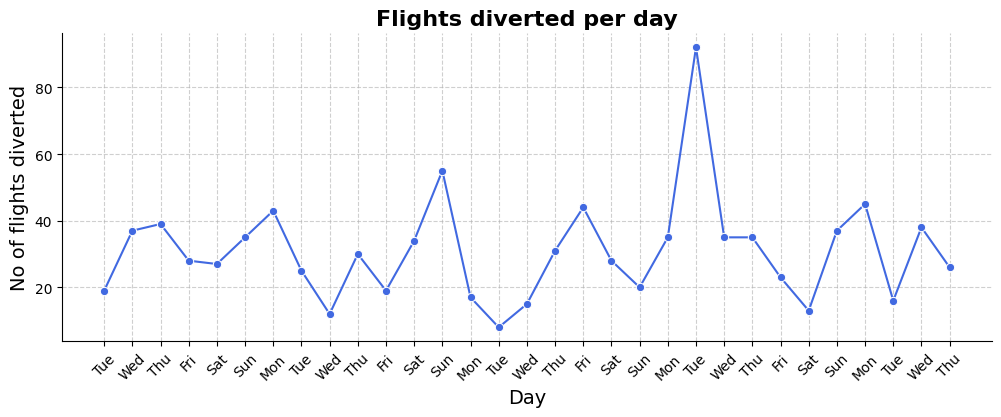

In [276]:
temp.columns = ["Date", "Count"]
temp["Day"] = pd.to_datetime(temp["Date"]).dt.day
temp["Day of week"] = pd.to_datetime(temp["Date"]).dt.strftime("%a")

plt.figure(figsize=(fig_width, fig_height))
p = sns.lineplot(data=temp, x="Day", y="Count", marker="o", color="royalblue")
p.set_xticks(temp["Day"], labels=temp["Day of week"], rotation=45)
plt.title("Flights diverted per day", fontsize=16, fontweight="bold")
plt.xlabel("Day", fontsize=14)
plt.ylabel("No of flights diverted", fontsize=14)
sns.despine()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
temp = None

## 18. Diverted by cities

#### Inbound + Outbound

In [99]:
temp = get_diverted()
temp = pd.DataFrame(pd.concat([temp["ORIGIN"], temp["DEST"]]), columns=["IATA"]).merge(airports, how="inner", left_on="IATA", right_on="IATA")
print(temp["City"].value_counts())
temp = None

City
Chicago              138
New York             107
Dallas-Fort Worth     74
San Francisco         72
Atlanta               71
                    ... 
Dubuque IA             1
North Platte           1
Harrisburg             1
Eugene                 1
Santa Rosa             1
Name: count, Length: 200, dtype: int64


#### Inbound

In [100]:
temp = get_diverted()
temp = pd.DataFrame(temp["DEST"])
temp.columns = ["IATA"]
temp = temp.merge(airports, how="inner", left_on="IATA", right_on="IATA")
print(temp["City"].value_counts())
temp = None

City
Chicago          82
San Francisco    47
New York         46
Washington       43
Detroit          41
                 ..
Manchester NH     1
Harrisburg        1
Eugene            1
Pittsburgh        1
Santa Rosa        1
Name: count, Length: 177, dtype: int64


#### Outbound

In [101]:
temp = get_diverted()
temp = pd.DataFrame(temp["ORIGIN"])
temp.columns = ["IATA"]
temp = temp.merge(airports, how="inner", left_on="IATA", right_on="IATA")
print(temp["City"].value_counts())
temp = None

City
New York             61
Chicago              56
Dallas-Fort Worth    55
Atlanta              50
Denver               41
                     ..
Liberal               1
Amarillo              1
Syracuse              1
Concord               1
Mesa                  1
Name: count, Length: 121, dtype: int64


## 19. Diverted by Route

#### One way

In [102]:
temp = get_diverted()
temp = pd.DataFrame(temp.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()
temp.columns = ["ORIGIN", "DEST", "Count"]
temp.sort_values("Count", ascending=False, inplace=True)
print(temp.head())
temp = None

    ORIGIN DEST  Count
371    JFK  SFO      9
289    EWR  SFO      6
275    EWR  DFW      6
644    SEA  HNL      5
541    ORD  LAX      5


#### Combined

In [103]:
temp = get_diverted()
temp = pd.DataFrame(temp.groupby(["ORIGIN", "DEST"])["FL_DATE"].count()).reset_index()
temp.columns = ["ORIGIN", "DEST", "Count"]
temp.sort_values("Count", ascending=False, inplace=True)

temp = temp.merge(temp, how="inner", left_on=["ORIGIN", "DEST"], right_on=["DEST", "ORIGIN"])
temp["Count"] = temp["Count_x"] + temp["Count_y"]
temp.drop(["Count_x", "Count_y"], axis=1, inplace=True)

print(temp.head(6))
print(temp.shape)

  ORIGIN_x DEST_x ORIGIN_y DEST_y  Count
0      JFK    SFO      SFO    JFK     11
1      EWR    SFO      SFO    EWR      7
2      EWR    DFW      DFW    EWR      9
3      ORD    LAX      LAX    ORD     10
4      LAX    ORD      ORD    LAX     10
5      BUR    JFK      JFK    BUR      6
(164, 5)


In [104]:
temp["Combined"] = temp.apply(lambda x: "".join(sorted([x["ORIGIN_x"], x["DEST_x"], x["ORIGIN_y"], x["DEST_y"]])), axis=1)
temp.drop_duplicates(subset=["Combined"], inplace=True)
temp.drop(["Combined"], axis=1, inplace=True)
print(temp.head())
print(temp.shape)
temp = None

  ORIGIN_x DEST_x ORIGIN_y DEST_y  Count
0      JFK    SFO      SFO    JFK     11
1      EWR    SFO      SFO    EWR      7
2      EWR    DFW      DFW    EWR      9
3      ORD    LAX      LAX    ORD     10
5      BUR    JFK      JFK    BUR      6
(82, 5)


# Advanced Statistics

## 1. Busiest Airports/Cities and Departure Delay Correlation

In [304]:
busy = pd.DataFrame(pd.concat([schedule["ORIGIN"], schedule["DEST"]]), columns=["IATA"]).merge(airports, how="inner", left_on="IATA", right_on="IATA")
busy = pd.DataFrame(busy["City"].value_counts()).reset_index()

late, early = split_late_early_departure()
late = late.merge(airports, how="inner", left_on="DEST", right_on="IATA")
early = early.merge(airports, how="inner", left_on="DEST", right_on="IATA")
temp = schedule.merge(airports, how="inner", left_on="DEST", right_on="IATA")
late, early, temp = group_count("City", "OP_CARRIER", late, early, temp)
late.rename(columns={"OP_CARRIER": "count"}, inplace=True)
temp.rename(columns={"OP_CARRIER": "count"}, inplace=True)
late = late.merge(temp, how="inner", left_on="City", right_on="City")
late["Percent"] = pd.DataFrame(late["count_x"] / late["count_y"])
late = late[["City", "Percent"]]

print(busy.head())
print(late.head())
early = None
temp = None

                City  count
0            Atlanta  61651
1            Chicago  57951
2           New York  47285
3  Dallas-Fort Worth  45502
4            Houston  38777
          City   Percent
0     Aberdeen  0.166667
1      Abilene  0.201183
2  Adak Island  0.111111
3        Agana  0.408451
4    Aguadilla  0.288660


In [305]:
temp = late.merge(busy, how="inner", left_on="City", right_on="City")
temp["Global_Traffic_Share"] = temp["count"] / temp["count"].max()
temp.rename(columns={"Percent": "Late_Percent"}, inplace=True)
temp.drop(columns=["count"], inplace=True)
print(temp.head())
busy = None
late = None

          City  Late_Percent  Global_Traffic_Share
0     Aberdeen      0.166667              0.001946
1      Abilene      0.201183              0.005466
2  Adak Island      0.111111              0.000292
3        Agana      0.408451              0.002303
4    Aguadilla      0.288660              0.006310


In [306]:
temp[["Late_Percent", "Global_Traffic_Share"]].corr(method="pearson")

,Late_Percent,Global_Traffic_Share
Late_Percent,1.00000,0.16412
Global_Traffic_Share,0.16412,1.00000


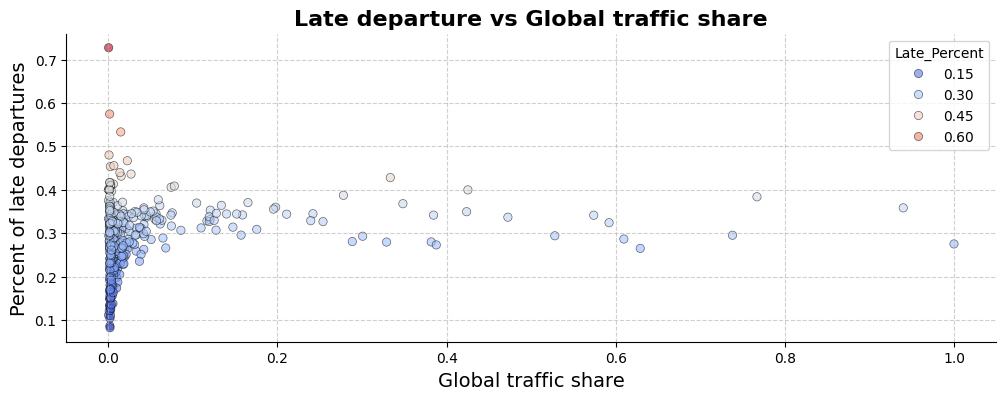

In [311]:
plt.figure(figsize=(fig_width, fig_height))
p = sns.scatterplot(data=temp, x="Global_Traffic_Share", y="Late_Percent", hue="Late_Percent", palette="coolwarm", edgecolor="black", alpha=0.6)
plt.title("Late departure vs Global traffic share", fontsize=16, fontweight='bold')
plt.xlabel("Global traffic share", fontsize=14)
plt.ylabel("Percent of late departures", fontsize=14)
sns.despine()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### Insight:
For airports/cities with low traffic, they can have both high and low departure delays. It shows a lack of importance given to schedule management.

However as airports get bigger and have more traffic, we see they delays from 30-50% of the times. This could be because they implement good schedule management.

## 2. Busiest Airports/Cities and Busiest Airlines Correlation

In [109]:
busy1 = schedule[["ORIGIN", "OP_CARRIER"]]
busy1.columns = ["AIRPORT", "AIRLINE"]
busy2 = schedule[["DEST", "OP_CARRIER"]]
busy2.columns = ["AIRPORT", "AIRLINE"]
busy = pd.DataFrame(pd.concat([busy1, busy2]))

busy = busy.merge(airlines, how="inner", left_on="AIRLINE", right_on="IATA")
busy = busy[["AIRPORT", "AIRLINE", "Name"]]
busy.columns = ["AIRPORT", "AIRLINE", "AIRLINE_NAME"]
busy = busy.merge(airports, how="inner", left_on="AIRPORT", right_on="IATA")
busy = busy[["AIRPORT", "AIRLINE", "AIRLINE_NAME", "Name"]]
busy.columns = ["AIRPORT", "AIRLINE", "AIRLINE_NAME", "AIRPORT_NAME"]
busy.drop(["AIRPORT", "AIRLINE"], axis=1, inplace=True)

print(busy.head())
print(busy.columns)
busy1 = None
busy2 = None

        AIRLINE_NAME                              AIRPORT_NAME
0  American Airlines  Phoenix Sky Harbor International Airport
1  American Airlines   Dallas Fort Worth International Airport
2  American Airlines         Los Angeles International Airport
3  American Airlines   Dallas Fort Worth International Airport
4  American Airlines         Los Angeles International Airport
Index(['AIRLINE_NAME', 'AIRPORT_NAME'], dtype='object')


In [110]:
busy_airports = pd.DataFrame(busy.groupby("AIRPORT_NAME").count()).reset_index()
busy_airports.columns = ["AIRPORT_NAME", "AIRPORT_COUNT"]
busy_airlines = pd.DataFrame(busy.groupby("AIRLINE_NAME").count()).reset_index()
busy_airlines.columns = ["AIRLINE_NAME", "AIRLINE_COUNT"]

busy = busy.merge(busy_airports, how="inner", left_on="AIRPORT_NAME", right_on="AIRPORT_NAME")
busy = busy.merge(busy_airlines, how="inner", left_on="AIRLINE_NAME", right_on="AIRLINE_NAME")

print(busy.head())
print(busy_airports.head())
print(busy_airlines.head())

        AIRLINE_NAME                              AIRPORT_NAME  AIRPORT_COUNT  \
0  American Airlines  Phoenix Sky Harbor International Airport          29128   
1  American Airlines   Dallas Fort Worth International Airport          44956   
2  American Airlines         Los Angeles International Airport          35384   
3  American Airlines   Dallas Fort Worth International Airport          44956   
4  American Airlines         Los Angeles International Airport          35384   

   AIRLINE_COUNT  
0         150996  
1         150996  
2         150996  
3         150996  
4         150996  
                      AIRPORT_NAME  AIRPORT_COUNT
0        Aberdeen Regional Airport            120
1         Abilene Regional Airport            337
2  Abraham Lincoln Capital Airport            226
3                     Adak Airport             18
4    Akron Canton Regional Airport           1050
                  AIRLINE_NAME  AIRLINE_COUNT
0              Alaska Airlines          40526
1      

<Axes: xlabel='AIRLINE_COUNT', ylabel='AIRPORT_COUNT'>

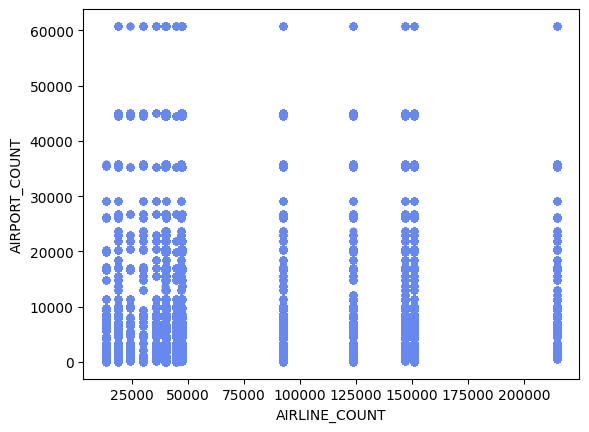

In [111]:
busy.plot(kind="scatter", x="AIRLINE_COUNT", y="AIRPORT_COUNT")

In [112]:
busy["N_AIRPORT_COUNT"] = busy["AIRPORT_COUNT"] / busy["AIRPORT_COUNT"].max()
busy["N_AIRLINE_COUNT"] = busy["AIRLINE_COUNT"] / busy["AIRLINE_COUNT"].max()

print(busy[["N_AIRPORT_COUNT", "N_AIRLINE_COUNT"]].corr(method="pearson"))

                 N_AIRPORT_COUNT  N_AIRLINE_COUNT
N_AIRPORT_COUNT          1.00000          0.04888
N_AIRLINE_COUNT          0.04888          1.00000


### Insight:
We see those airpots with high traffic are not correlated to airlines with high fly count.

# Business Requirements/Questions

## 1. How each airline reacts to airports with most delays?

In [113]:
late_arr, _  = split_late_early_arrival()
late_dep, _ = split_late_early_departure()

late_arr["LATE_ARR"] = late_arr["ARR_TIME"] - late_arr["CRS_ARR_TIME"]
late_dep["LATE_DEP"] = late_dep["DEP_TIME"] - late_dep["CRS_DEP_TIME"]

late_arr_port = pd.DataFrame(late_arr.groupby("DEST")["LATE_ARR"].mean()).reset_index()
late_arr_port_line = pd.DataFrame(late_arr.groupby(["DEST", "OP_CARRIER"])["LATE_ARR"].mean()).reset_index()
late_dep_port = pd.DataFrame(late_dep.groupby("ORIGIN")["LATE_DEP"].mean()).reset_index()
late_dep_port_line = pd.DataFrame(late_dep.groupby(["ORIGIN", "OP_CARRIER"])["LATE_DEP"].mean()).reset_index()

late_arr = late_arr_port.merge(late_arr_port_line, how="inner", left_on="DEST", right_on="DEST")
late_arr.columns = ["AIRPORT", "AIRPORT_DELAY", "AIRLINE", "AIRLINE_DELAY"]
late_dep = late_dep_port.merge(late_dep_port_line, how="inner", left_on="ORIGIN", right_on="ORIGIN")
late_dep.columns = ["AIRPORT", "AIRPORT_DELAY", "AIRLINE", "AIRLINE_DELAY"]

late_arr["AIRPORT_DELAY"] = late_arr["AIRPORT_DELAY"].dt.seconds
late_arr["AIRLINE_DELAY"] = late_arr["AIRLINE_DELAY"].dt.seconds
late_dep["AIRPORT_DELAY"] = late_dep["AIRPORT_DELAY"].dt.seconds
late_dep["AIRLINE_DELAY"] = late_dep["AIRLINE_DELAY"].dt.seconds

print(late_arr.head())
print(late_arr.shape)
print(late_dep.head())
print(late_dep.shape)
late_arr_port = None
late_arr_port_line = None
late_dep_port = None
late_dep_port_line = None

  AIRPORT  AIRPORT_DELAY AIRLINE  AIRLINE_DELAY
0     ABE           2211      9E           1698
1     ABE           2211      DL           1995
2     ABE           2211      EV           4197
3     ABE           2211      G4            832
4     ABE           2211      OH           1378
(1690, 4)
  AIRPORT  AIRPORT_DELAY AIRLINE  AIRLINE_DELAY
0     ABE           3244      9E           2198
1     ABE           3244      DL            876
2     ABE           3244      EV           7055
3     ABE           3244      G4           1702
4     ABE           3244      OH           1938
(1689, 4)


In [114]:
def plot_airport_delay(df, selected_airport):
    df_airport = df[df['AIRPORT'] == selected_airport]

    # Plot grouped bar chart
    airlines = df_airport['AIRLINE']
    x = range(len(airlines))
    width = 0.4

    plt.bar(x, df_airport['AIRPORT_DELAY'], width=width, label='Airport Delay', color='yellow', alpha=0.6)
    plt.bar([i + width for i in x], df_airport['AIRLINE_DELAY'], width=width, label='Airline Delay', color='red', alpha=0.8)
    plt.xticks([i + width / 2 for i in x], airlines, rotation=45)

    plt.show()


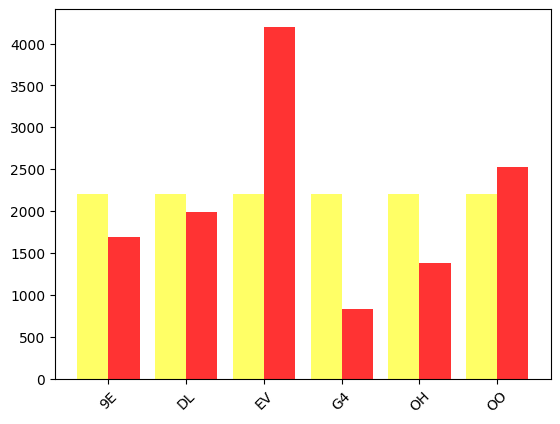

In [115]:
plot_airport_delay(late_arr, "ABE")

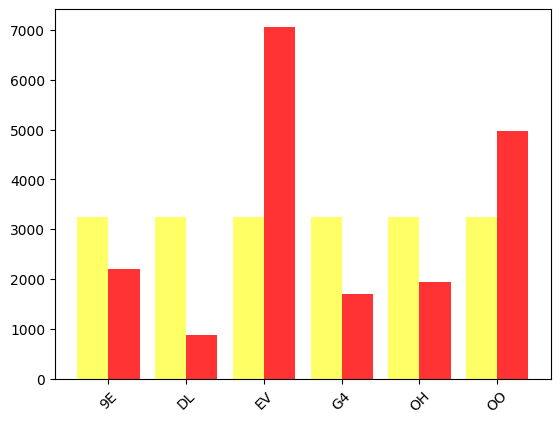

In [116]:
plot_airport_delay(late_dep, "ABE")

## 2. Which airlines cover the most routes?

In [117]:
most = pd.DataFrame(routes["Airline"].value_counts()).reset_index()
most = most.merge(airlines, how="inner", left_on="Airline", right_on="IATA")
most = most[["Name", "Country", "count"]]
most.columns = ["Name", "Country", "Routes"]
print(most.head())
print(most.shape)
most = None

                Name        Country  Routes
0            Ryanair        Ireland    2484
1  American Airlines  United States    2349
2    United Airlines  United States    2180
3    Delta Air Lines  United States    1979
4         US Airways  United States    1960
(521, 3)


## 3. Identify any possible monopolies of airlines

In [118]:
busy1 = schedule[["ORIGIN", "OP_CARRIER"]]
busy1.columns = ["AIRPORT", "AIRLINE"]
busy2 = schedule[["DEST", "OP_CARRIER"]]
busy2.columns = ["AIRPORT", "AIRLINE"]
busy = pd.DataFrame(pd.concat([busy1, busy2]))

busy = busy.merge(airlines, how="inner", left_on="AIRLINE", right_on="IATA")
busy = busy[["AIRPORT", "AIRLINE", "Name"]]
busy.columns = ["AIRPORT", "AIRLINE", "AIRLINE_NAME"]
busy = busy.merge(airports, how="inner", left_on="AIRPORT", right_on="IATA")
busy = busy[["AIRPORT", "AIRLINE", "AIRLINE_NAME", "Name"]]
busy.columns = ["AIRPORT", "AIRLINE", "AIRLINE_NAME", "AIRPORT_NAME"]
busy.drop(["AIRPORT", "AIRLINE"], axis=1, inplace=True)

print(busy.head())
print(busy.columns)
busy1 = None
busy2 = None

        AIRLINE_NAME                              AIRPORT_NAME
0  American Airlines  Phoenix Sky Harbor International Airport
1  American Airlines   Dallas Fort Worth International Airport
2  American Airlines         Los Angeles International Airport
3  American Airlines   Dallas Fort Worth International Airport
4  American Airlines         Los Angeles International Airport
Index(['AIRLINE_NAME', 'AIRPORT_NAME'], dtype='object')


In [119]:
busy["Count"] = 1
busy = pd.DataFrame(busy.groupby(["AIRLINE_NAME", "AIRPORT_NAME"]).count()).reset_index()
busy = busy.pivot(index="AIRPORT_NAME", columns="AIRLINE_NAME", values="Count").fillna(0).astype(int)
busy.head()

AIRLINE_NAME,Alaska Airlines,Allegiant Air,American Airlines,American Eagle Airlines,Atlantic Southeast Airlines,Comair,Delta Air Lines,Frontier Airlines,Hawaiian Airlines,JetBlue Airways,Mesa Airlines,Pinnacle Airlines,SkyWest,Southwest Airlines,Spirit Airlines,United Airlines
AIRPORT_NAME,,,,,,,,,,,,,,,,
Aberdeen Regional Airport,0,0,0,0,0,0,0,0,0,0,0,0,120,0,0,0
Abilene Regional Airport,0,0,0,337,0,0,0,0,0,0,0,0,0,0,0,0
Abraham Lincoln Capital Airport,0,18,0,102,0,0,0,0,0,0,0,0,106,0,0,0
Adak Airport,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Akron Canton Regional Airport,0,0,0,98,169,513,55,0,0,0,0,119,0,0,96,0


<Axes: xlabel='AIRLINE_NAME'>

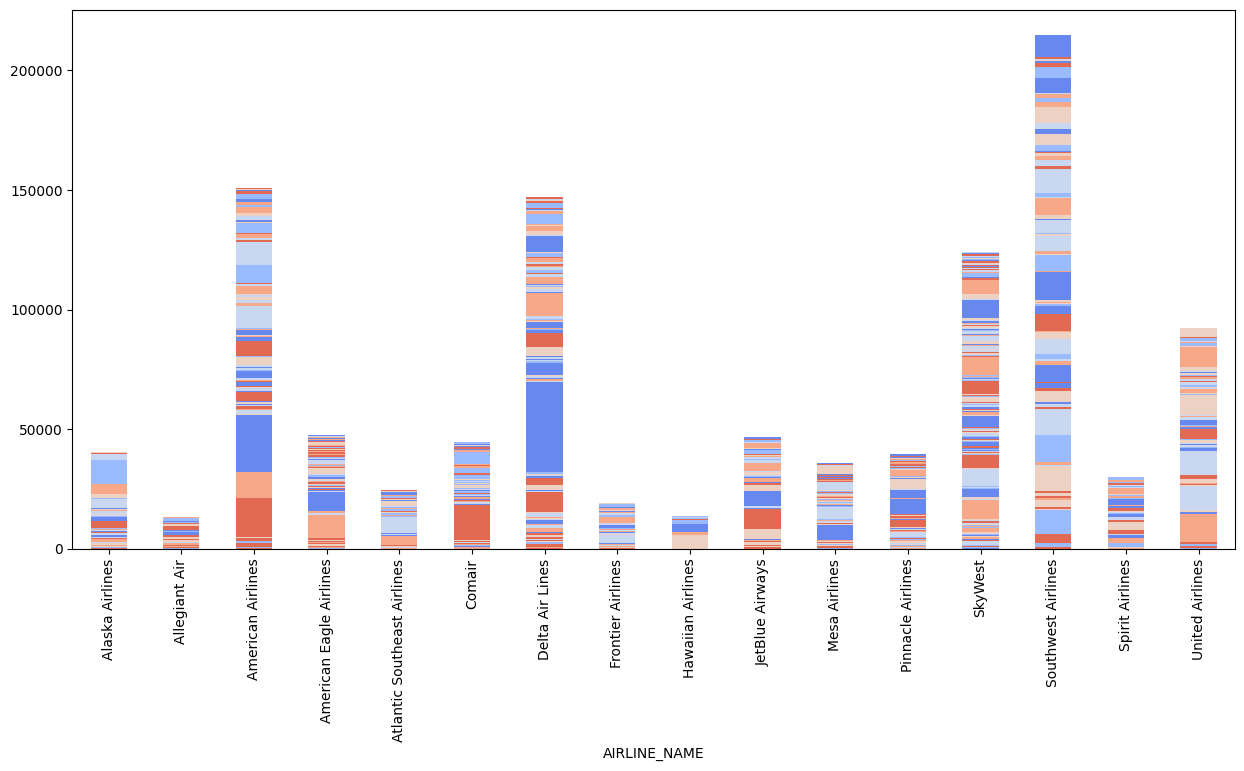

In [120]:
busy.T.plot(kind="bar", stacked=True, legend=False, figsize=(15, 7))

<Axes: ylabel='AIRPORT_NAME'>

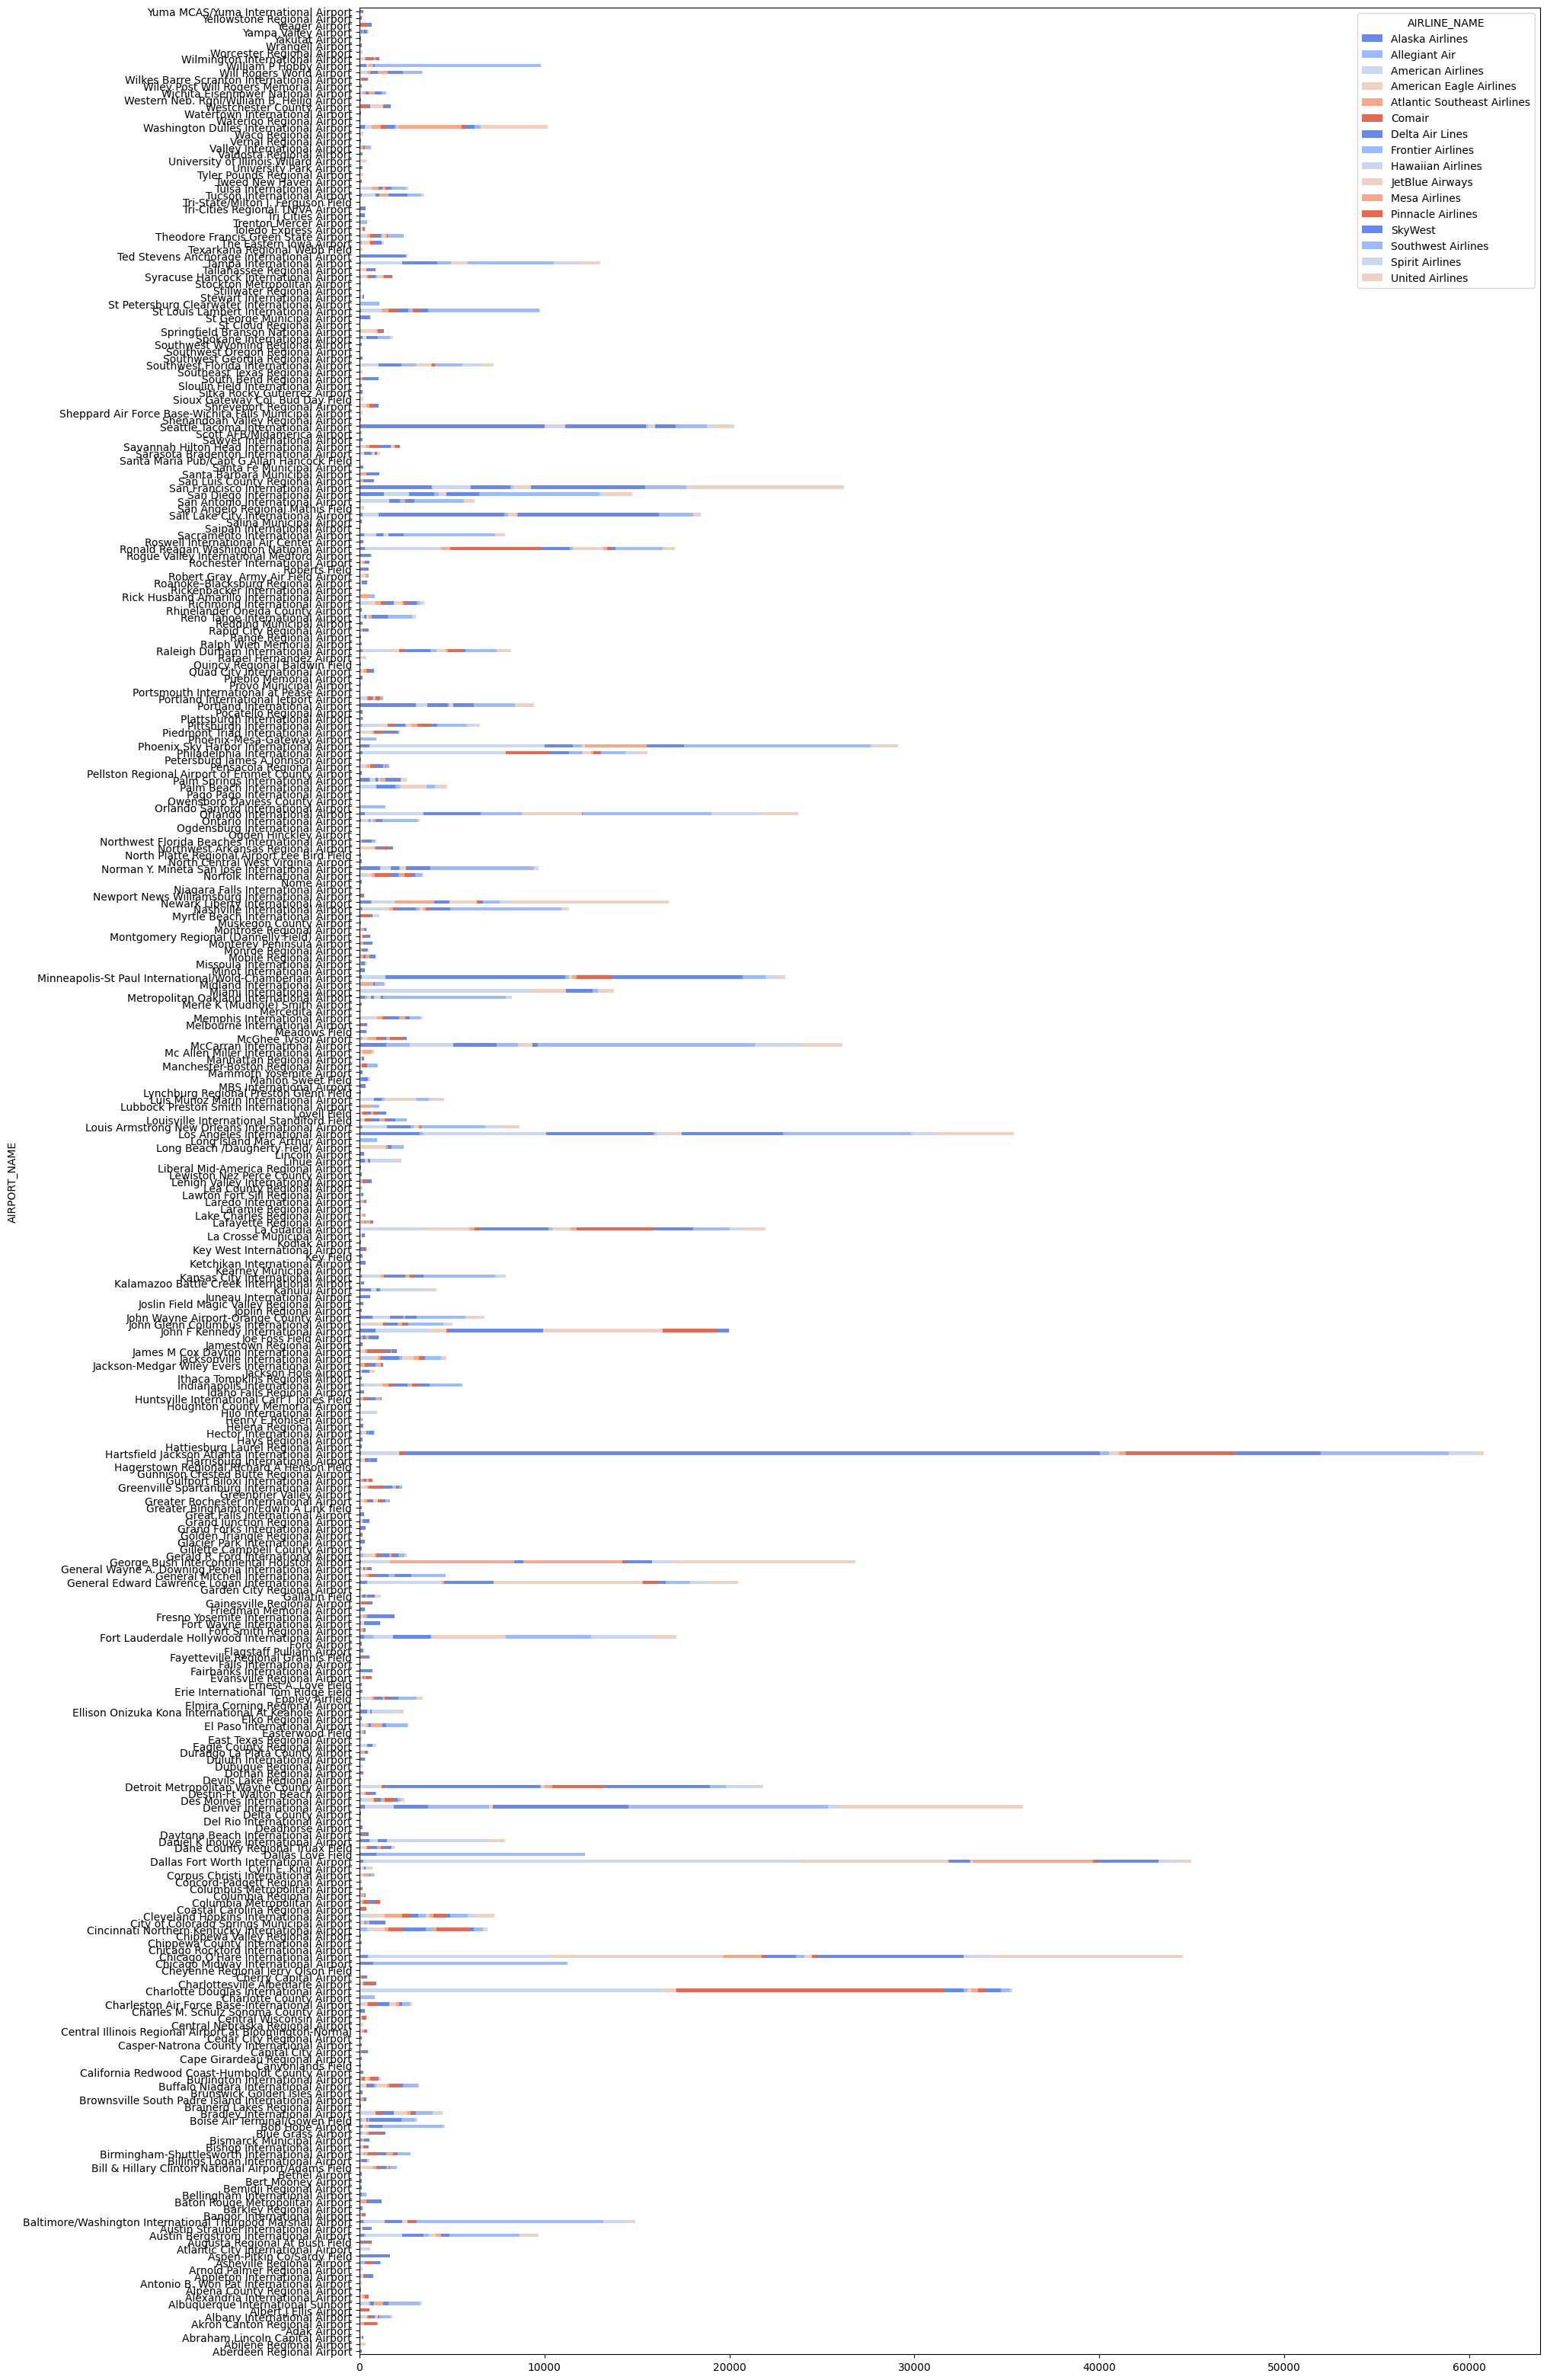

In [121]:
busy.plot(kind="barh", stacked=True, figsize=(20, 40), yticks=[])

### Insight:
1. Delta Air Lines has most activity in Hartsfield Atlanta Airport, more than any other airline in that airport. However it does not have major presences in most of other busy airports except Minneapolis-St Paul airport.
2. American Eagle and Southwest airlines have strong presence in all busy airports.

# Notes
1. Saturday has lowest flights of the week. Followed by Sunday and Tuesday.